In [1]:
import os

from datasets import load_dataset

while "notebooks" in os.getcwd():
    os.chdir("..")

from numpy import array_equal
from sklearn.metrics import accuracy_score

from mim_nlp.classifier.svm import SVMClassifier

/home/mbrzozowski/projects/mim_nlp/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading an open-source dataset

In [2]:
dataset = load_dataset("imdb")

In [3]:
dataset

DatasetDict({
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

# Training the model on the dataset

In [4]:
model = SVMClassifier(
    tfidf_transformer_parameters={
        "sublinear_tf": True,
        "min_df": 5,
        "max_df": 0.5,
        "norm": "l2",
        "encoding": "latin-1",
        "ngram_range": (1, 2),
    },
    linear_svc_parameters={"C": 5, "fit_intercept": True},
)

In [5]:
model.fit(dataset["train"]["text"], dataset["train"]["label"])

/home/mbrzozowski/projects/mim_nlp/.venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Get predictions on the test set

In [6]:
predictions = model.predict(dataset["test"]["text"])

In [7]:
predictions

array([0, 0, 0, ..., 1, 0, 1])

# Calculate the accuracy score

In [8]:
accuracy_score(dataset["test"]["label"], predictions)

0.90052

# Explaining the result

In [9]:
example_text = dataset["test"]["text"][0]
example_text

'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as they have

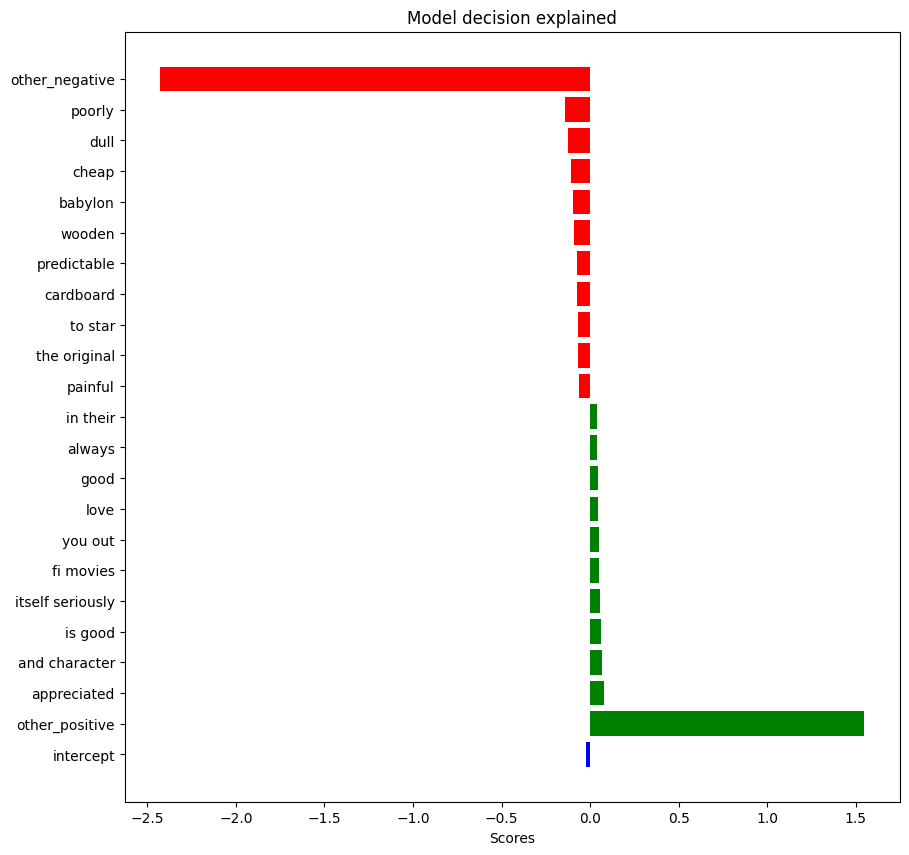

In [10]:
model.explain_text(example_text, 10)

In [11]:
model.get_top_words_from_text(example_text, 10)

[Explanation(word='poorly', score=-0.14110480014687068),
 Explanation(word='dull', score=-0.12416717737992428),
 Explanation(word='cheap', score=-0.10924820854767452),
 Explanation(word='babylon', score=-0.09500008795280639),
 Explanation(word='wooden', score=-0.08960975968498697),
 Explanation(word='appreciated', score=0.0792118279356415),
 Explanation(word='predictable', score=-0.07593517537665405),
 Explanation(word='cardboard', score=-0.07447887666630651),
 Explanation(word='to star', score=-0.07050229163928175),
 Explanation(word='and character', score=0.06668387212398195),
 Explanation(word='other words', score=-0.6335515764067565)]

# Saving the model

In [12]:
model.save_without_stop_words("models/svm")

# Loading the model

In [13]:
model_loaded = SVMClassifier.load("models/svm")

In [14]:
predictions_from_loaded = model.predict(dataset["test"]["text"])

In [15]:
assert array_equal(predictions, predictions_from_loaded)